# Compare: TreeCorr JK Covariances
- Load outputs from `run.py`
- Plot data
- Compare covariances results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

## Load Covariances

In [22]:
import glob
fname_base = 'output/kmeans%i/%s_l%i-z%i.npz'

def load_files(tag, npatches):
    out = []
    # for i in range(5):
    #     res = []
    #     for j in range(3):
    #         file = fname_base%(npatches, tag, i, j)
    #         res.append(np.load(file))
    #     out.append(res)
    
    res = []
    for i in range(3):
        file = fname_base%(npatches, tag, 99, i)
        res.append(np.load(file))
    out.append(res)
                   
    return out

def pick_bin(vec, ix1, ix2):
    return vec[ix1][ix2]

In [23]:
npatches = 20
tag = 'mock_test'

In [24]:
vecs = load_files(tag, npatches) # all bins
# vec = pick_bin(vecs, 99, 0) # lbd_bin, z_bin

In [27]:
vecs[0]

## Plot Results

In [17]:
def get_label(vec):
    if 'nobj' in list(vec.keys()):
        return 'Nsize: %i'%vec['nobj']
    else:
        return None
    
def plot_profile(vecs, l, z, ax=None):
    if ax is None: ax = plt.gca()
    vec = pick_bin(vecs, l, z)
    r, xi = vec['r'], vec['mean']
    sig = vec['sig']
    label = get_label(vec)
    
    ax.loglog()
    #ax.set_xscale('log')
    ax.scatter(r, xi)
    ax.errorbar(r, xi, yerr=sig, lw=3, ls='', label=label)
    
def plot_sig(vecs, l, z, ax=None):
    if ax is None: ax = plt.gca()
    vec = pick_bin(vecs, l, z)
    r, xi = vec['r'], vec['mean']
    sig = vec['sig']
    label = get_label(vec)
    
    ax.loglog()
    ax.scatter(r, sig)
    ax.plot(r, sig, label=label)
    

IndexError: list index out of range

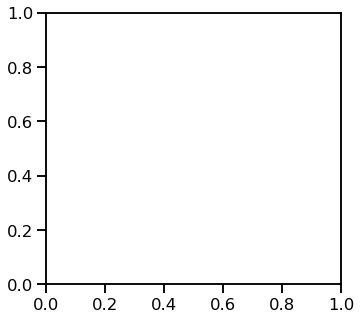

In [18]:
# zbins = [0.2, 0.35, 0.5, 0.65]
plt.figure(figsize=(18,5))
zmeans = [0.275, 0.4, 0.6]

for i in range(3):
    plt.subplot(1, 3, i+1)
    #plot_profile(vecs, 0, i)
    plot_profile(vecs, 1, i)
    plot_profile(vecs, 2, i)
    plot_profile(vecs, 3, i)
    plot_profile(vecs, 4, i)    
    #plt.xlabel('R [Mpc/h]')
    plt.title('zmean: %.3f'%zmeans[i])
    plt.xlabel(r'$\theta$ (arcmin)')
    plt.xlim(4., )
    plt.ylim(0.05, 50)
    plt.legend(fontsize=12)

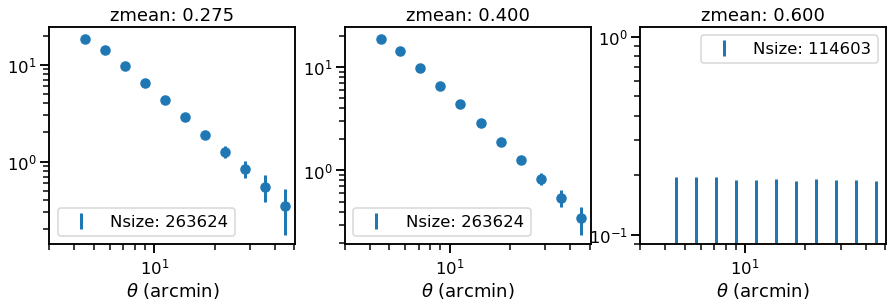

In [25]:
# zbins = [0.2, 0.35, 0.5, 0.65]
plt.figure(figsize=(15,4))
zmeans = [0.275, 0.4, 0.6]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plot_profile(vecs, 0, i)
    #plt.xlabel('R [Mpc/h]')
    plt.title('zmean: %.3f'%zmeans[i])
    plt.xlabel(r'$\theta$ (arcmin)')
    plt.xlim(3., )
    #plt.ylim(0.1, 20)
    plt.legend()

In [21]:
rmin, rmax = 4, 200
nbins = 31
print(np.logspace(np.log10(rmin), np.log10(rmax), nbins))


[  4.           4.55713952   5.19188015   5.91503055   6.73890486
   7.67753241   8.74689659   9.96520703  11.35320969  12.93454013
  14.73612599  16.78864553  19.12705     21.79115885  24.82633778
  28.28427125  32.22384256  36.71213658  41.8255821   47.65125327
  54.28835233  61.84989894  70.46465466  80.27931559  91.46101039
 104.20014619 118.71365099 135.24866756 154.08676192 175.54871798
 200.        ]


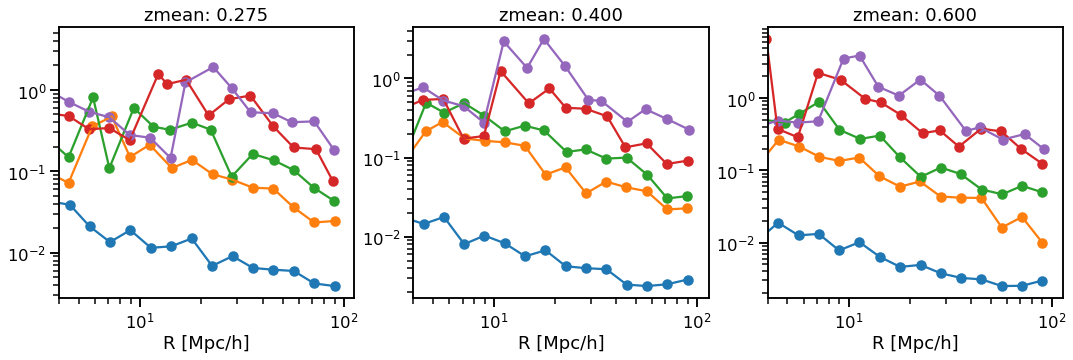

In [27]:
# zbins = [0.2, 0.35, 0.5, 0.65]
plt.figure(figsize=(18,5))
zmeans = [0.275, 0.4, 0.6]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plot_sig(vecs, 0, i)
    plot_sig(vecs, 1, i)
    plot_sig(vecs, 2, i)
    plot_sig(vecs, 3, i)
    plot_sig(vecs, 4, i)    
    plt.xlabel('R [Mpc/h]')
    plt.title('zmean: %.3f'%zmeans[i])
    #plt.xlabel(r'$\theta$ (arcmin)')
    plt.xlim(4., )
    #plt.ylim(0.1, 50)
    #plt.legend(fontsize=12)

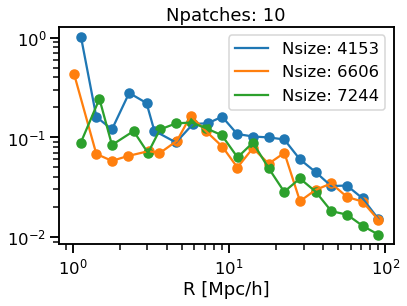

In [28]:
# zbins = [0.2, 0.35, 0.5, 0.65]

zmeans = [0.275, 0.4, 0.6]
for i in range(3):
    plot_sig(vecs, 5, i)
    plt.xlabel('R [Mpc/h]')
plt.title('Npatches: %i'%npatches)
#plt.xlabel(r'$\theta$ (arcmin)')
plt.legend()

In [34]:
vec = np.load('./output/kmeans20/mock_test_l99-z2.npz')

In [35]:
vec['r']

array([ 4.52961231,  5.6765806 ,  7.14044792,  8.98390868, 11.3115808 ,
       14.2502193 , 17.94621189, 22.59345027, 28.4416919 , 35.81340935,
       45.07692764])

In [36]:
vec['mean']

array([-0.02176037, -0.02175316, -0.02175125, -0.02167101, -0.02181359,
       -0.02084184, -0.02216077, -0.02199975, -0.02085218, -0.02225003,
       -0.02192182])